In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

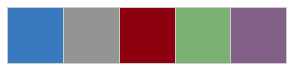

In [79]:
# see http://xkcd.com/color/rgb/ for color list
colors = ["windows blue", "grey", "crimson", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

In [80]:
cur_pal = sns.xkcd_palette(colors)

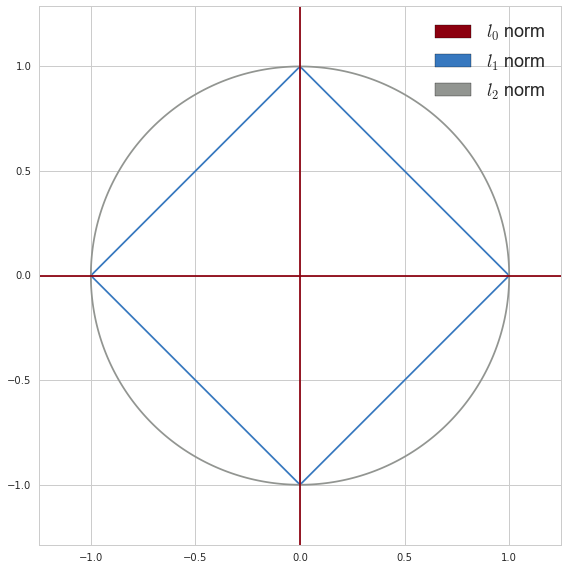

In [82]:
from matplotlib import mlab, cm

delta = 0.01

x = np.arange(-1.5, 1.5+delta, delta)
y = np.arange(-1.5, 1.5+delta, delta)
X, Y = np.meshgrid(x, y)
#l2 norm
Zl2 = np.sqrt(X * X + Y * Y)
Zl1 = np.abs(X) + np.abs(Y)
levels = np.array([1.0, 4.0])  # Boost the upper limit to avoid truncation errors.

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn

fig = plt.figure(figsize=(8, 8))
plt.contour(X, Y, Zl1, levels, colors=np.array(cur_pal[:2]))
plt.contour(X, Y, Zl2, levels, colors=np.array(cur_pal[1:3]))
# plot l0 norm manually
plt.plot([-1.5, 1.5], [0.0, 0.0], color=np.array(cur_pal[2]))
plt.plot([0.0, 0.0], [-1.5, 1.5], color=np.array(cur_pal[2]))

plt.axis('equal')
plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.tight_layout()
proxy = [plt.Rectangle((0,0),1,1,fc = cur_pal[2]),
         plt.Rectangle((0,0),1,1,fc = cur_pal[0]),
         plt.Rectangle((0,0),1,1,fc = cur_pal[1])]

plt.legend(proxy, ['$l_0$ norm', '$l_1$ norm', '$l_2$ norm'], fontsize=18)
plt.savefig('../img/l012_norms.png', dpi=120)